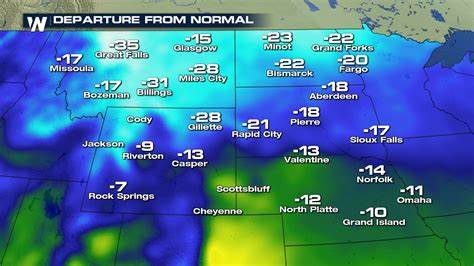

### Problem Statement:
###### Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here,

#### loading  some   imp  libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
tDF=pd.read_csv("temp.csv")

In [3]:
tDF.head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
tDF.shape

(8425, 23)

#### checking for null values

In [5]:
tDF.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There are a lot of null values in the columns.

#### Checking for blank spaces, random characters in each column

In [6]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in tDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((tDF[c] == s).sum())

  in Date =  0
? in Date =  0
- in Date =  0
 ? in Date =  0
 - in Date =  0
?  in Date =  0
-  in Date =  0
 ?  in Date =  0
 -  in Date =  0
NA in Date =  0
N/A in Date =  0
 NA in Date =  0
 N/A in Date =  0
  in Location =  0
? in Location =  0
- in Location =  0
 ? in Location =  0
 - in Location =  0
?  in Location =  0
-  in Location =  0
 ?  in Location =  0
 -  in Location =  0
NA in Location =  0
N/A in Location =  0
 NA in Location =  0
 N/A in Location =  0
  in MinTemp =  0
? in MinTemp =  0
- in MinTemp =  0
 ? in MinTemp =  0
 - in MinTemp =  0
?  in MinTemp =  0
-  in MinTemp =  0
 ?  in MinTemp =  0
 -  in MinTemp =  0
NA in MinTemp =  0
N/A in MinTemp =  0
 NA in MinTemp =  0
 N/A in MinTemp =  0
  in MaxTemp =  0
? in MaxTemp =  0
- in MaxTemp =  0
 ? in MaxTemp =  0
 - in MaxTemp =  0
?  in MaxTemp =  0
-  in MaxTemp =  0
 ?  in MaxTemp =  0
 -  in MaxTemp =  0
NA in MaxTemp =  0
N/A in MaxTemp =  0
 NA in MaxTemp =  0
 N/A in MaxTemp =  0
  in Rainfall =  0
? in Ra

There are no blank spaces, random characters  in columns of the dataset

##### It is observed that  the total of null values in each column is less than 1% of total data . Therefore dropping those rows.


In [7]:
tDF.dropna(inplace=True)

In [8]:
tDF.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [9]:
tDF.shape

(3790, 23)

There are no more null values.

In [10]:
tDF.reset_index(inplace=True,drop=True) # resetting the index

#### Getting the basic summary and statistical information of the data.

In [11]:
tDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3790 non-null   object 
 1   Location       3790 non-null   object 
 2   MinTemp        3790 non-null   float64
 3   MaxTemp        3790 non-null   float64
 4   Rainfall       3790 non-null   float64
 5   Evaporation    3790 non-null   float64
 6   Sunshine       3790 non-null   float64
 7   WindGustDir    3790 non-null   object 
 8   WindGustSpeed  3790 non-null   float64
 9   WindDir9am     3790 non-null   object 
 10  WindDir3pm     3790 non-null   object 
 11  WindSpeed9am   3790 non-null   float64
 12  WindSpeed3pm   3790 non-null   float64
 13  Humidity9am    3790 non-null   float64
 14  Humidity3pm    3790 non-null   float64
 15  Pressure9am    3790 non-null   float64
 16  Pressure3pm    3790 non-null   float64
 17  Cloud9am       3790 non-null   float64
 18  Cloud3pm

In [12]:
tDF.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201
std,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000
25%,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000
50%,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000
75%,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000
max,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000


In [13]:
tDF.skew()

MinTemp          0.039516
MaxTemp          0.237727
Rainfall         7.592966
Evaporation      2.114169
Sunshine        -0.591076
WindGustSpeed    0.699143
WindSpeed9am     0.935658
WindSpeed3pm     0.356434
Humidity9am     -0.194562
Humidity3pm      0.174915
Pressure9am      0.032381
Pressure3pm      0.096222
Cloud9am        -0.128711
Cloud3pm        -0.155781
Temp9am          0.029503
Temp3pm          0.239057
dtype: float64

Rainfall, evaporation and  windspeed9am  are considerably skewed

In [14]:
tDF.nunique() #the number of unique values in each column

Date             1873
Location            6
MinTemp           249
MaxTemp           288
Rainfall          174
Evaporation       101
Sunshine          140
WindGustDir        16
WindGustSpeed      46
WindDir9am         16
WindDir3pm         16
WindSpeed9am       31
WindSpeed3pm       28
Humidity9am        86
Humidity3pm        93
Pressure9am       338
Pressure3pm       332
Cloud9am            9
Cloud3pm            9
Temp9am           266
Temp3pm           286
RainToday           2
RainTomorrow        2
dtype: int64

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Columns

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

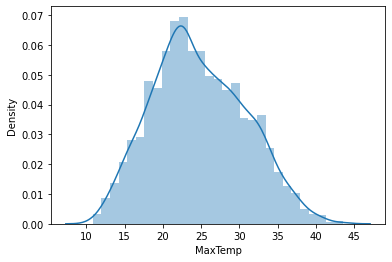

In [15]:
sns.distplot(tDF.MaxTemp)

In [16]:
tDF.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

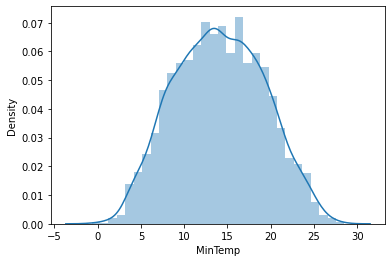

In [17]:
sns.distplot(tDF.MinTemp)

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

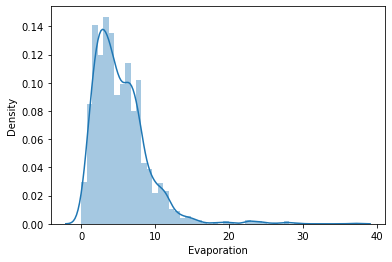

In [18]:
sns.distplot(tDF.Evaporation)

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

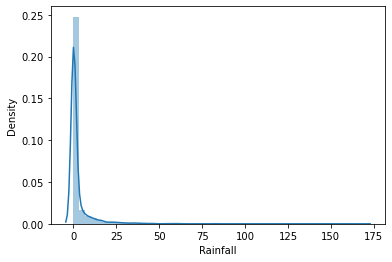

In [19]:
sns.distplot(tDF.Rainfall)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

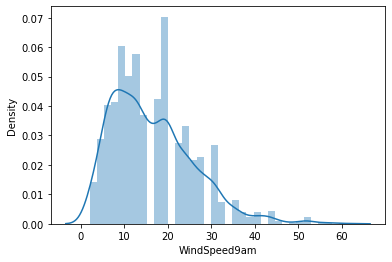

In [20]:
sns.distplot(tDF.WindSpeed9am)

Distributions are continuous and look slightly skewed.

#### Analyzing the Feature Columns

In [21]:
tDF.dtypes[tDF.dtypes == 'object'] #Identifying the Categorical Columns

Date            object
Location        object
WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

In [22]:
tDF.Date.unique()

array(['2009-03-10', '2009-03-11', '2009-03-12', ..., '2012-08-16',
       '2012-09-28', '2012-11-10'], dtype=object)

In [23]:
tDF.Date.value_counts()

2011-02-07    4
2011-03-25    4
2011-06-24    4
2011-06-27    4
2011-11-17    4
             ..
2011-02-11    1
2011-02-12    1
2011-02-23    1
2011-02-27    1
2012-11-10    1
Name: Date, Length: 1873, dtype: int64

each date has 22-25 records of various attributes.

#### Extracting 'Day' and 'Month' and 'Year' columns from 'Date' Columnn

In [24]:
tDF['Date']=pd.to_datetime(tDF['Date']) #creating datetime type dataframe

In [25]:
tDF['Day']=tDF['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe

In [26]:
tDF['Month']=tDF['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe

In [27]:
tDF['Year']=tDF['Date'].apply(lambda y:y.year) #mapping month values to 'Year' column in main Date

In [28]:
tDF.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,...,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,3,2009
1,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,...,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,3,2009
2,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,...,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009
3,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,...,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009
4,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,...,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009


In [29]:
tDF.dtypes[tDF.dtypes != 'object'] #Identifying non object type Columns

Date             datetime64[ns]
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustSpeed           float64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
Day                       int64
Month                     int64
Year                      int64
dtype: object

In [30]:
tDF.nunique()

Date             1873
Location            6
MinTemp           249
MaxTemp           288
Rainfall          174
Evaporation       101
Sunshine          140
WindGustDir        16
WindGustSpeed      46
WindDir9am         16
WindDir3pm         16
WindSpeed9am       31
WindSpeed3pm       28
Humidity9am        86
Humidity3pm        93
Pressure9am       338
Pressure3pm       332
Cloud9am            9
Cloud3pm            9
Temp9am           266
Temp3pm           286
RainToday           2
RainTomorrow        2
Day                31
Month              12
Year                8
dtype: int64

In [31]:
tDF.Location.value_counts()

PerthAirport    1159
Melbourne       1126
CoffsHarbour     552
Brisbane         524
Darwin           249
Williamtown      180
Name: Location, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

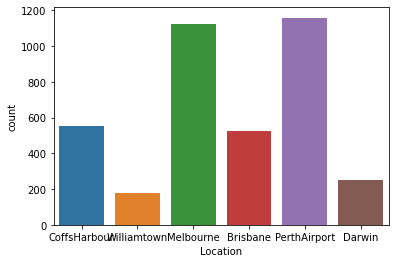

In [32]:
sns.countplot(tDF.Location)
plt.tight_layout

Reports from all stations are fairly balanced.

In [33]:
tDF.Rainfall.value_counts()

0.0     2565
0.2      153
0.4       77
1.2       44
0.6       43
        ... 
23.6       1
28.4       1
29.6       1
44.4       1
20.4       1
Name: Rainfall, Length: 174, dtype: int64

In [34]:
tDF.Evaporation.value_counts()

4.0     139
2.2     115
2.4     113
3.0     113
2.8     112
       ... 
15.6      1
17.0      1
13.6      1
14.0      1
0.7       1
Name: Evaporation, Length: 101, dtype: int64

lat and lon are cordinates of geolocations for which weather data from the stations are available.

In [ ]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
for col in tDF.drop(columns=['Date']):
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.distplot(tDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Columns with continuous data distribution are skewed.

### Interpreting Relationship between Independent  and Dependent Variables

Grouping the data date-wise to better understand the relationship between 'Date' and 'Next_Tmax' and 'Next_Tmin'

In [36]:
tDF.Date

0      2009-03-10
1      2009-03-11
2      2009-03-12
3      2009-03-13
4      2009-03-14
          ...    
3785   2012-11-06
3786   2012-11-07
3787   2012-11-08
3788   2012-11-09
3789   2012-11-10
Name: Date, Length: 3790, dtype: datetime64[ns]

In [37]:
tDF.Date

0      2009-03-10
1      2009-03-11
2      2009-03-12
3      2009-03-13
4      2009-03-14
          ...    
3785   2012-11-06
3786   2012-11-07
3787   2012-11-08
3788   2012-11-09
3789   2012-11-10
Name: Date, Length: 3790, dtype: datetime64[ns]

### Checking for Outliers in continuous data type Features.

ValueError: could not convert string to float: 'CoffsHarbour'

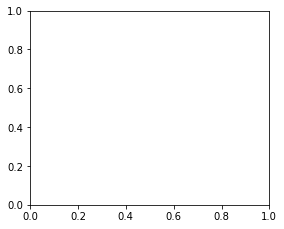

In [39]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
for col in tDF.drop(columns=['Date']):
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.distplot(tDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

### Removing Outliers

####  Encoding 'Year' column

In [41]:
tDF.Year.unique()

array([2009, 2010, 2015, 2016, 2011, 2012, 2013, 2014], dtype=int64)

In [42]:
tDF['Year'] = tDF.Year.map({2013:1,2014:2,2015:3,2016:4,2017:5})

In [43]:
tDF.Year

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3785   NaN
3786   NaN
3787   NaN
3788   NaN
3789   NaN
Name: Year, Length: 3790, dtype: float64

### Finding Correlation 

In [44]:
t_corr =tDF.corr()

In [45]:
t_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
MinTemp,1.000000,0.740095,0.071315,0.498337,0.080572,0.135500,0.067415,0.092084,-0.078824,0.044881,-0.475074,-0.485264,0.124513,0.038071,0.861185,0.713084,0.001670,-0.255511,0.382826
MaxTemp,0.740095,1.000000,-0.120673,0.595026,0.517246,0.122229,0.059749,0.051563,-0.416987,-0.426143,-0.354381,-0.453176,-0.311638,-0.309302,0.890487,0.977768,0.007810,-0.197259,0.207449
Rainfall,0.071315,-0.120673,1.000000,-0.064387,-0.237101,0.073402,0.001508,0.016936,0.304251,0.267475,-0.120569,-0.067936,0.221206,0.191268,-0.050368,-0.126175,-0.014764,-0.008826,0.026828
Evaporation,0.498337,0.595026,-0.064387,1.000000,0.348017,0.258328,0.213671,0.180236,-0.399978,-0.316077,-0.277451,-0.298626,-0.141269,-0.190743,0.567189,0.581462,0.003973,-0.091349,0.381730
Sunshine,0.080572,0.517246,-0.237101,0.348017,1.000000,-0.013350,-0.019337,0.042117,-0.510185,-0.622432,0.019715,-0.057406,-0.701603,-0.720530,0.348258,0.541263,0.000574,-0.000546,-0.005560
WindGustSpeed,0.135500,0.122229,0.073402,0.258328,-0.013350,1.000000,0.695486,0.704099,-0.246922,-0.146193,-0.359885,-0.328083,0.054118,0.124275,0.094809,0.084074,-0.010107,0.042056,-0.123114
WindSpeed9am,0.067415,0.059749,0.001508,0.213671,-0.019337,0.695486,1.000000,0.517137,-0.342992,-0.212078,-0.161069,-0.141669,0.015041,0.076719,0.027315,0.053732,0.004820,0.025950,-0.174293
WindSpeed3pm,0.092084,0.051563,0.016936,0.180236,0.042117,0.704099,0.517137,1.000000,-0.151553,-0.061113,-0.271530,-0.226362,0.051006,0.065421,0.082761,0.023673,-0.011415,0.050704,0.059580
Humidity9am,-0.078824,-0.416987,0.304251,-0.399978,-0.510185,-0.246922,-0.342992,-0.151553,1.000000,0.659416,0.118130,0.170804,0.445165,0.350630,-0.359558,-0.409115,-0.000957,-0.076445,0.246878
Humidity3pm,0.044881,-0.426143,0.267475,-0.316077,-0.622432,-0.146193,-0.212078,-0.061113,0.659416,1.000000,-0.045489,0.043131,0.486994,0.500553,-0.154409,-0.500537,0.012256,-0.013784,0.228668


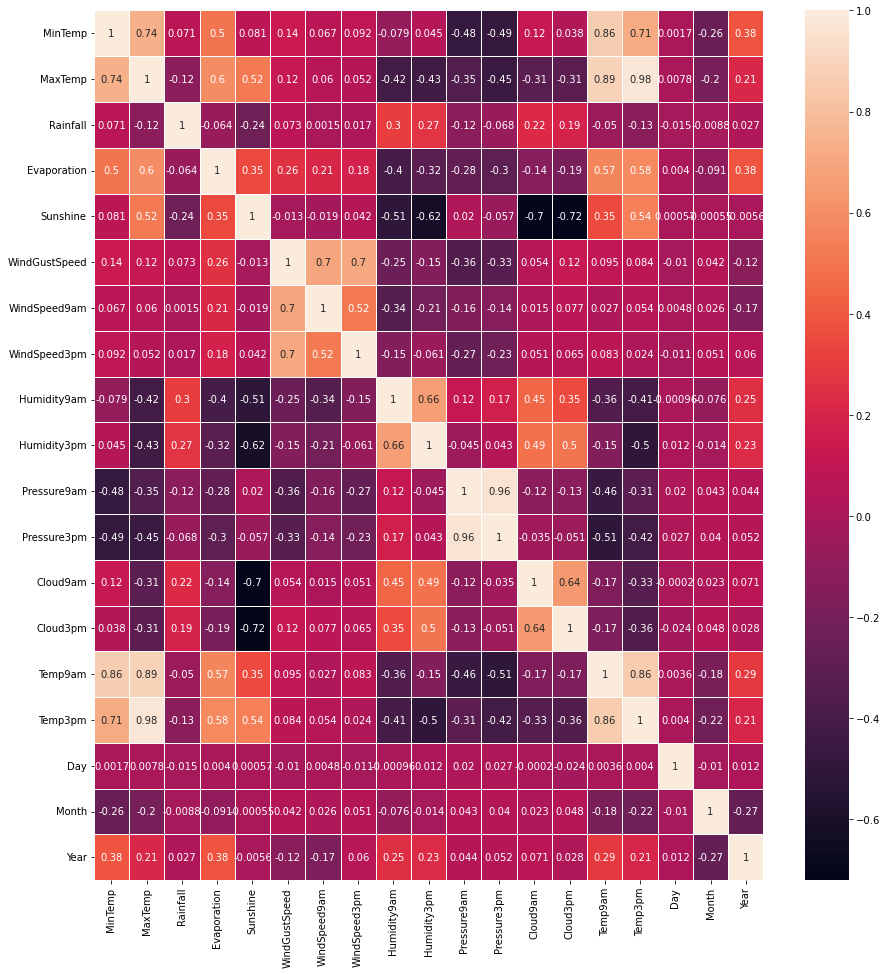

In [46]:
plt.figure(figsize=(15,16))
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

In [ ]:
cross_val_score(knn,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

#### Decision Tree Regression

In [51]:
cross_val_score(dt,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

NameError: name 'cross_val_score' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

#### Random Forest Regressor

In [ ]:
parameter = {'n_estimators':[30,60],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [ ]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [ ]:
GridCV.fit(x_train,y_train)

In [ ]:
GridCV.best_params_

In [ ]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 40, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 5)


In [ ]:
Best_mod.fit(x_train,y_train)


In [ ]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)


##### Random Forest Regressor has an accuracy of 88.80%

#### Saving The Model

In [ ]:
import joblib
joblib.dump(Best_mod,"BestModelTemp.pkl")

#### Loading The Model

In [ ]:
mod=joblib.load("BestModelTemp.pkl")

In [ ]:
print(mod.predict(x_test))

In [ ]:
y_test

In [ ]:
predicted

In [ ]:
y_test.index=predicted.index

In [ ]:
Prediction_accuracy = predicted.join(y_test)
Prediction_accuracy.head(20)